In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/kaylar/Downloads/sales-data-set.csv")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [3]:
df.shape
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
df['Store'].value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

In [5]:
df['Date'].value_counts()

Date
23/12/2011    3027
25/11/2011    3021
16/12/2011    3013
09/12/2011    3010
17/02/2012    3007
              ... 
09/07/2010    2903
16/07/2010    2901
20/08/2010    2901
27/08/2010    2898
13/08/2010    2896
Name: count, Length: 143, dtype: int64

In [6]:
df['Weekly_Sales'].value_counts()

Weekly_Sales
10.00      353
5.00       289
20.00      232
15.00      215
12.00      175
          ... 
1946.71      1
2117.63      1
2184.65      1
2667.10      1
1076.80      1
Name: count, Length: 359464, dtype: int64

In [7]:
df['Weekly_Sales']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [8]:
df["Weekly_Sales"]=df["Weekly_Sales"].astype(float)
df2=df[df["Weekly_Sales"]<0]
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,10/08/2012,-139.65,False
2384,1,18,04/05/2012,-1.27,False
6048,1,47,19/02/2010,-863.00,False
6049,1,47,12/03/2010,-698.00,False
6051,1,47,08/10/2010,-58.00,False
...,...,...,...,...,...
419597,45,80,12/02/2010,-0.43,True
419598,45,80,19/02/2010,-0.27,False
419603,45,80,16/04/2010,-1.61,False
419614,45,80,02/07/2010,-0.27,False


In [9]:
filter_negative = (df['Weekly_Sales']<0) & (df['IsHoliday'] == True)
filtered_df = df[filter_negative]
filtered_df[['Weekly_Sales', 'IsHoliday']]

,Weekly_Sales,IsHoliday
16298,-159.00,True
16307,-88.00,True
46364,-1.00,True
46403,-3.14,True
47130,-23.85,True
...,...,...
402335,-342.84,True
414240,-17.00,True
417814,-24.00,True
419597,-0.43,True


In [10]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [12]:
df['Quarter'] = df['Date'].dt.quarter
df['Quarter'].info()
df

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Quarter
Non-Null Count   Dtype
--------------   -----
421570 non-null  int32
dtypes: int32(1)
memory usage: 1.6 MB


,Store,Dept,Date,Weekly_Sales,IsHoliday,Quarter
0,1,1,2010-02-05,24924.50,False,1
1,1,1,2010-02-12,46039.49,True,1
2,1,1,2010-02-19,41595.55,False,1
3,1,1,2010-02-26,19403.54,False,1
4,1,1,2010-03-05,21827.90,False,1
...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,3
421566,45,98,2012-10-05,628.10,False,4
421567,45,98,2012-10-12,1061.02,False,4
421568,45,98,2012-10-19,760.01,False,4


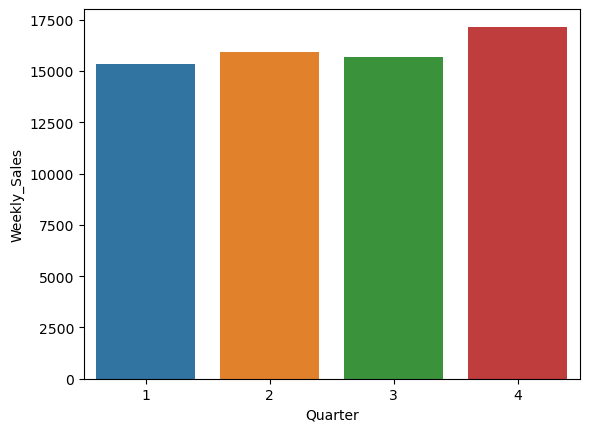

In [13]:
quarterAverageSales = df.groupby('Quarter')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Quarter', y='Weekly_Sales', data=quarterAverageSales)
plt.show()

In [14]:
holiday_counts = df.groupby('Quarter')['IsHoliday'].sum().reset_index()
holiday_counts

,Quarter,IsHoliday
0,1,8895
1,2,0
2,3,8861
3,4,11905


In [15]:
holidaySales = df['IsHoliday'].sum().mean()
holidaySales


29661.0

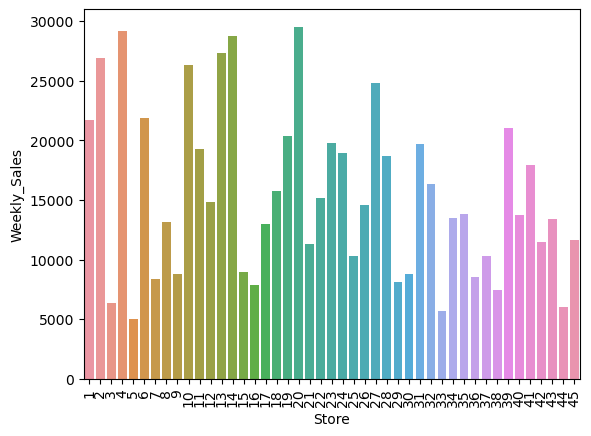

In [16]:
storeAverageSales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Store', y='Weekly_Sales', data=storeAverageSales)
plt.xticks(rotation=90)
plt.show()

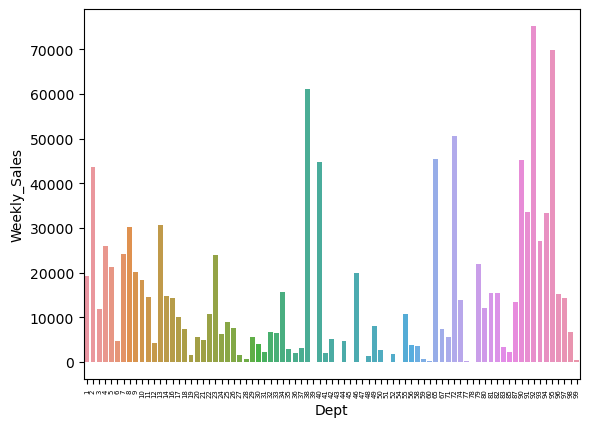

In [17]:
departmentAverageSales = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Dept', y='Weekly_Sales', data=departmentAverageSales)
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [18]:
sales_by_dept_quarter = df.groupby(['Dept', 'Quarter'])['Weekly_Sales'].mean().reset_index()
sales_pivot = sales_by_dept_quarter.pivot(index='Dept', columns='Quarter', values='Weekly_Sales').fillna(0)
sales_pivot

Quarter,1,2,3,4
Dept,,,,
1,19115.568054,19142.222199,14687.032644,25247.956459
2,42364.580923,43396.163698,45023.659867,43366.965384
3,9412.932781,7574.695869,20003.694494,9042.296366
4,25108.755758,25653.142313,26886.292911,26124.481204
5,21712.461055,17873.038061,15697.588055,32678.656891
...,...,...,...,...
95,66074.096114,72569.918177,73705.876589,65354.369556
96,13300.595500,15690.827919,16312.367418,15215.049014
97,13720.688675,14317.818654,14920.048303,13890.379113


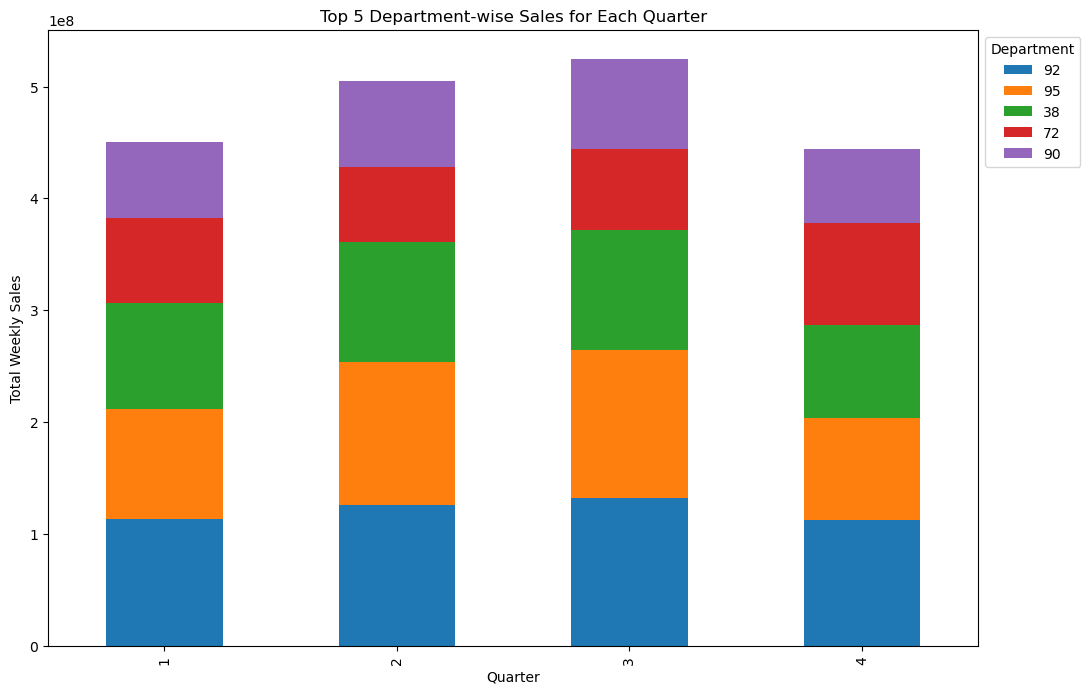

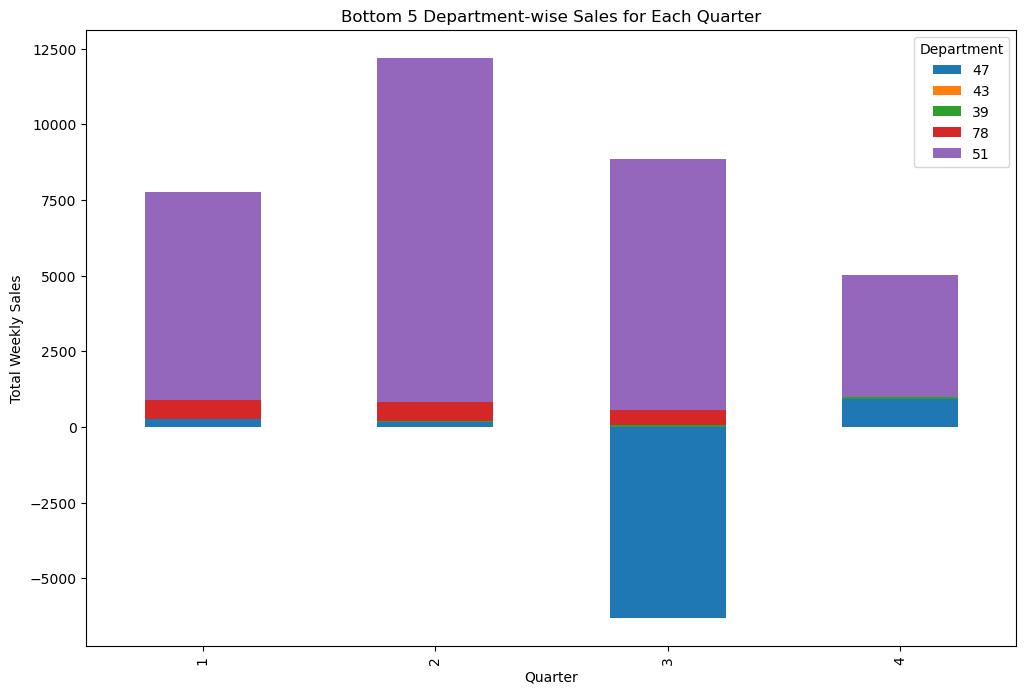

In [19]:
sales_by_dept_quarter = df.groupby(['Dept', 'Quarter'])['Weekly_Sales'].sum().reset_index()

sales_pivot = sales_by_dept_quarter.pivot(index='Dept', columns='Quarter', values='Weekly_Sales').fillna(0)

sales_pivot['Total_Sales'] = sales_pivot.sum(axis=1)

top5_depts = sales_pivot.nlargest(5, 'Total_Sales')
bottom5_depts = sales_pivot.nsmallest(5, 'Total_Sales')

top5_depts.drop('Total_Sales', axis=1).T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Department-wise Sales for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Weekly Sales')
plt.legend(title='Department', bbox_to_anchor=(1, 1))
plt.show()

bottom5_depts.drop('Total_Sales', axis=1).T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Bottom 5 Department-wise Sales for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Weekly Sales')
plt.legend(title='Department', bbox_to_anchor=(1, 1))
plt.show()

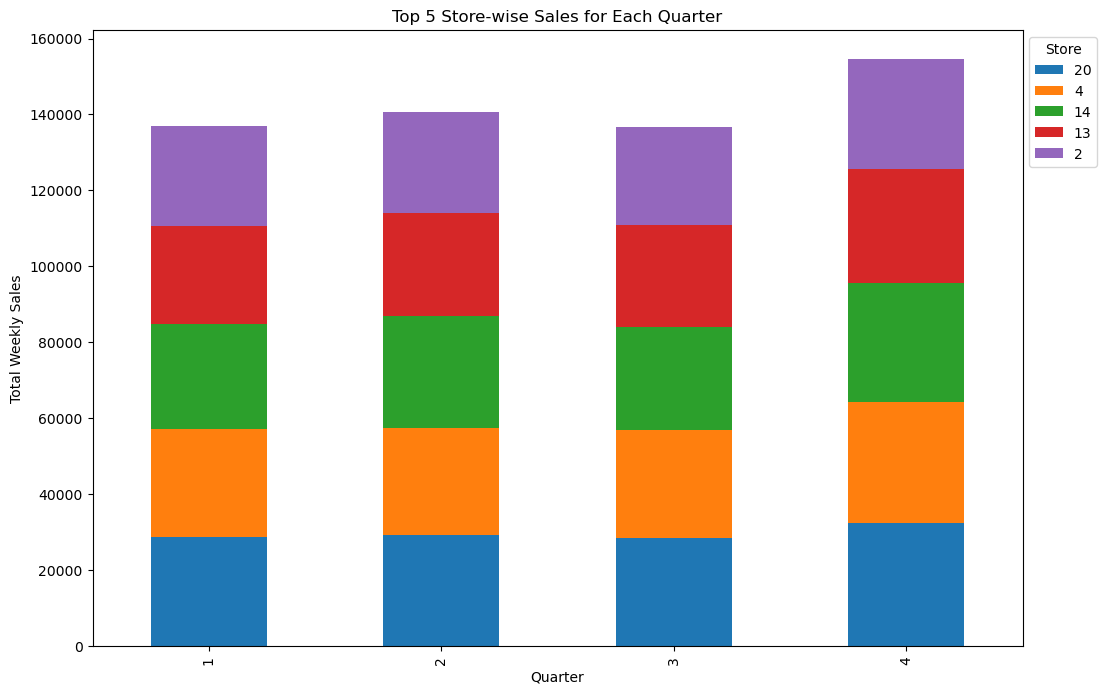

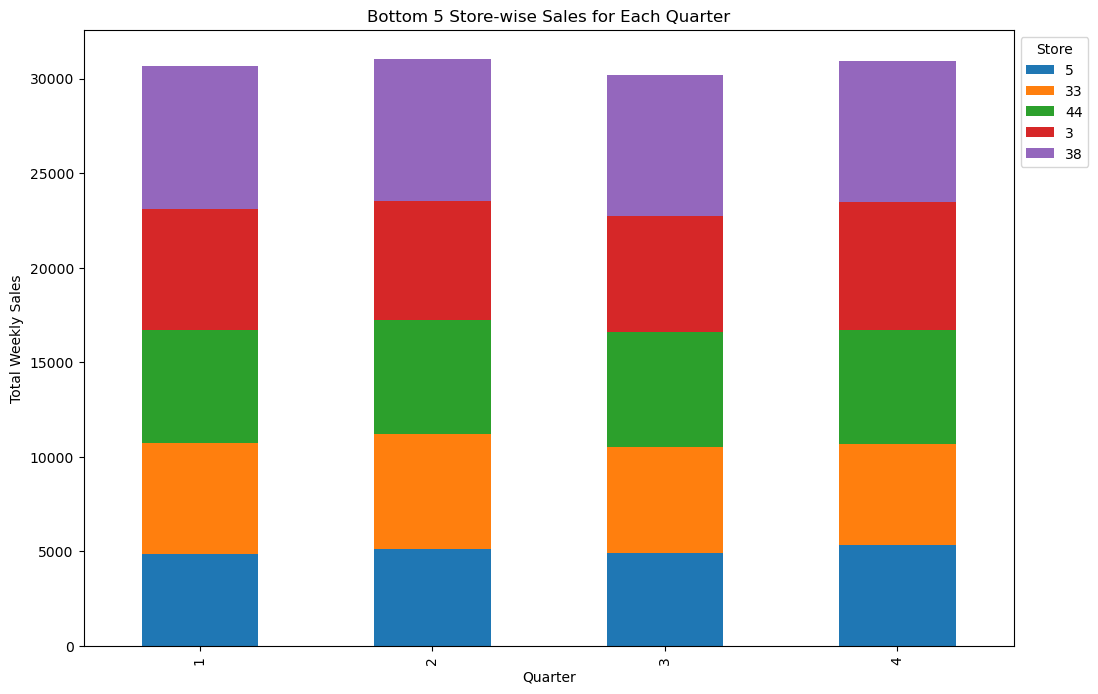

In [20]:
sales_by_store_quarter = df.groupby(['Store', 'Quarter'])['Weekly_Sales'].mean().reset_index()

sales_pivot_2 = sales_by_store_quarter.pivot(index='Store', columns='Quarter', values='Weekly_Sales').fillna(0)
sales_pivot_2['Total_Sales'] = sales_pivot_2.sum(axis=1)

top5_stores = sales_pivot_2.nlargest(5, 'Total_Sales')
bottom5_stores = sales_pivot_2.nsmallest(5, 'Total_Sales')

top5_stores.drop('Total_Sales', axis=1).T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Store-wise Sales for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(1, 1))
plt.show()

bottom5_stores.drop('Total_Sales', axis=1).T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Bottom 5 Store-wise Sales for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(1, 1))
plt.show()


In [21]:
stores_to_department = df.groupby('Store')['Dept'].sum().reset_index()
stores_to_department


,Store,Dept
0,1,454749
1,2,455425
2,3,370825
3,4,457340
4,5,371526
5,6,453812
6,7,432878
7,8,432217
8,9,355292
9,10,454210
